# Seaborn

A module for improved graphics built on top of Matplotlib and that plays nicely with the Pandas library. You can explore an extensive library at the official documentation: <https://seaborn.pydata.org/index.html>


In [65]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Correlogram

In [39]:
df = pd.read_csv("../datasets/gypsum_ks_daily_2018.csv")
df.fillna(method="bfill", inplace=True)
df.head()


,TIMESTAMP,STATION,PRESSUREAVG,PRESSUREMAX,PRESSUREMIN,SLPAVG,TEMP2MAVG,TEMP2MMIN,TEMP2MMAX,TEMP10MAVG,...,SOILTMP10MAX,SOILTMP10MIN,SOILTMP5AVG655,SOILTMP10AVG655,SOILTMP20AVG655,SOILTMP50AVG655,VWC5CM,VWC10CM,VWC20CM,VWC50CM
0,1/1/18 0:00,Gypsum,99.44,100.03,98.73,104.44,-15.15,-19.56,-11.00,-15.31,...,-1.18,-2.45,-1.33,-1.14,0.74,3.50,0.1377,0.1167,0.2665,0.2203
1,1/2/18 0:00,Gypsum,99.79,100.14,99.40,104.88,-16.48,-22.10,-10.40,-16.38,...,-1.56,-3.46,-2.10,-1.82,0.28,3.13,0.1234,0.1021,0.2642,0.2196
2,1/3/18 0:00,Gypsum,98.87,99.52,97.94,103.81,-11.03,-20.64,-2.71,-10.66,...,-1.49,-3.61,-2.21,-1.93,-0.08,2.76,0.1206,0.0965,0.2353,0.2189
3,1/4/18 0:00,Gypsum,98.22,98.54,97.90,102.99,-5.83,-11.79,0.24,-5.01,...,-0.98,-2.67,-1.60,-1.46,-0.21,2.45,0.1235,0.0973,0.2094,0.2182
4,1/5/18 0:00,Gypsum,98.10,98.42,97.75,102.88,-4.73,-14.22,5.36,-4.23,...,-0.72,-2.81,-1.54,-1.38,-0.25,2.25,0.1249,0.0976,0.2047,0.2180


In [57]:
df["TIMESTAMP"] = pd.to_datetime(df["TIMESTAMP"], format="%m/%d/%y %H:%M")
df["MONTH"] = df["TIMESTAMP"].dt.month_name()


In [75]:
df_subset = df[["MONTH","PRESSUREAVG","TEMP2MAVG","SOILTMP5AVG655"]]
df_subset.head()


,MONTH,PRESSUREAVG,TEMP2MAVG,SOILTMP5AVG655
0,January,99.44,-15.15,-1.33
1,January,99.79,-16.48,-2.10
2,January,98.87,-11.03,-2.21
3,January,98.22,-5.83,-1.60
4,January,98.10,-4.73,-1.54


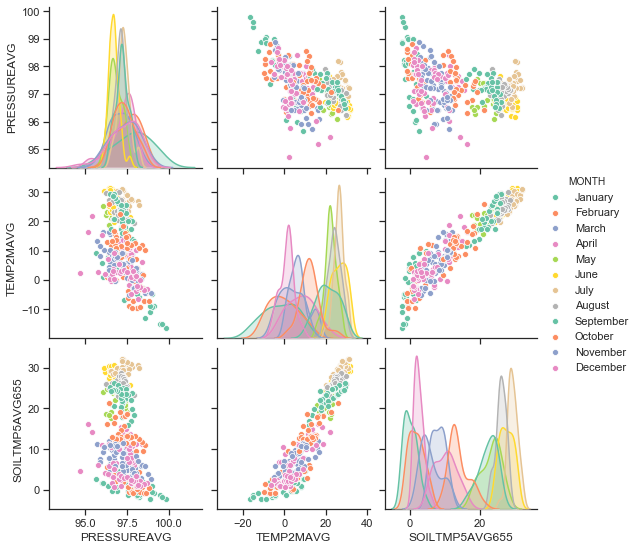

In [76]:
sns.pairplot(df_subset, kind="scatter", hue="MONTH", palette="Set2")
plt.show()

## Heatmap

In [127]:
df = pd.read_csv("../datasets/fargo_hourly_deep_soil_temperature.csv")
df["time_cst"] = pd.to_datetime(df["time_cst"], format="%m/%d/%y %H:%M")
df["MONTH"] = df["time_cst"].dt.month


In [128]:
df_grouped = df.groupby(["MONTH"]).mean().round(2)
df_grouped


,T5cm,T10cm,T20cm,T30cm,T40cm,T50cm,T60cm,T80cm,T100cm,T125cm,T150cm,T175cm,T200cm,T225cm
MONTH,,,,,,,,,,,,,,
1,-5.39,-4.80,-3.75,-2.76,-1.84,-1.00,-0.20,1.20,2.36,3.60,4.63,5.51,6.33,6.96
2,-5.41,-4.98,-4.17,-3.43,-2.74,-2.06,-1.38,-0.17,0.83,1.89,2.83,3.69,4.54,5.26
3,0.14,-0.17,-0.52,-0.66,-0.65,-0.56,-0.42,-0.01,0.48,1.14,1.85,2.56,3.41,4.07
4,5.82,5.03,3.94,3.11,2.51,2.07,1.77,1.49,1.48,1.73,2.08,2.48,3.12,3.58
5,13.66,12.60,11.16,10.04,9.11,8.29,7.56,6.35,5.49,4.76,4.31,4.08,4.18,4.21
6,19.87,18.88,17.44,16.19,15.14,14.20,13.32,11.74,10.44,9.12,8.08,7.26,6.75,6.26
7,22.32,21.42,20.18,19.09,18.16,17.30,16.50,15.02,13.75,12.36,11.19,10.18,9.44,8.67
8,20.93,20.45,19.75,19.09,18.49,17.94,17.40,16.36,15.39,14.26,13.24,12.31,11.52,10.68
9,16.96,16.90,16.80,16.68,16.52,16.33,16.11,15.62,15.08,14.39,13.72,13.06,12.49,11.80


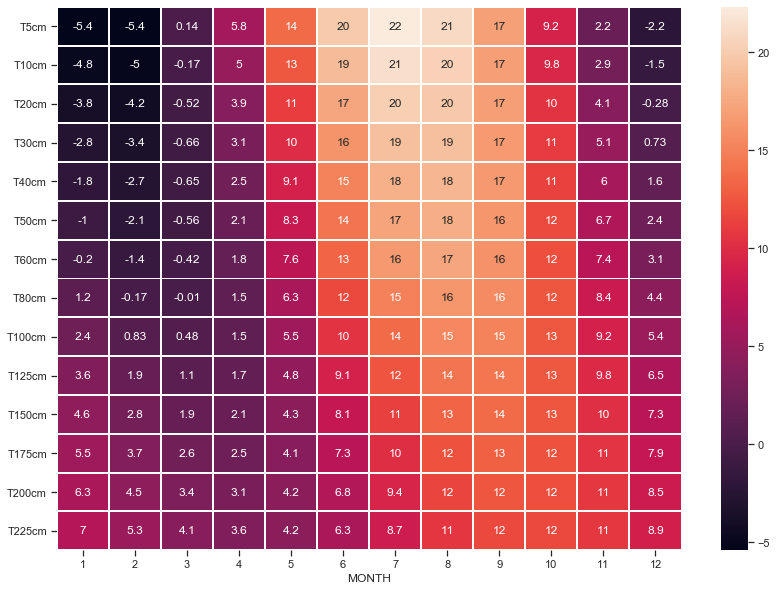

In [129]:
plt.figure(figsize=(14,10))
sns.heatmap(df_grouped.T, annot=True, linewidths=1)
plt.show()


## Boxplot

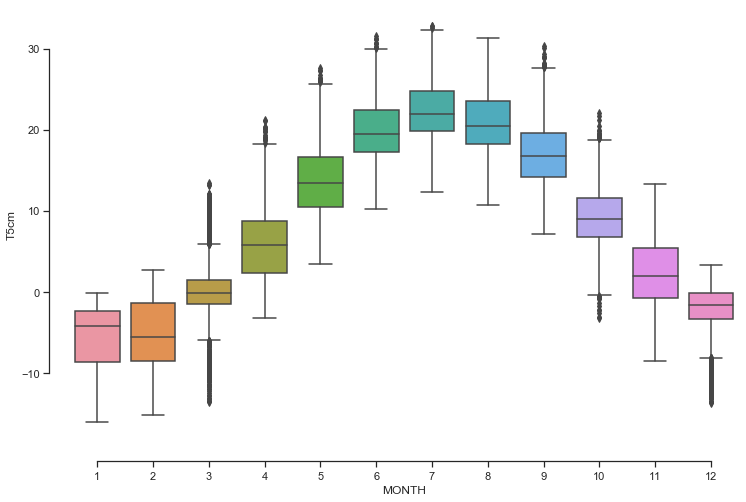

In [136]:
# Draw a nested boxplot to show bills by day and time
plt.figure(figsize=(12,8))
sns.boxplot(x="MONTH", y="T5cm", data=df, )
sns.despine(offset=20, trim=True)
